### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak na prawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_) 
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks

In [14]:
def ab_hough(edges, a_min=-5, a_max=5, a_step=.05, b_min=-100, b_max=100, b_step=1):
    A = np.arange(a_min, a_max, a_step)
    B = np.arange(b_min, b_max, b_step)
    
    H = np.zeros((A.shape[0], B.shape[0]))
    
    for x in range(edges.shape[0]):
        for y in range(edges.shape[1]):
            if not edges[x, y]: continue
            
            for a_idx, a in enumerate(A):
                b = y - a*x
                b_idx = np.argmin(abs(B-b))
                
                H[a_idx, b_idx] += 1
    
    return H

In [15]:
def show_hough(h, image):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('a')
    ax[1].set_ylabel('b')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

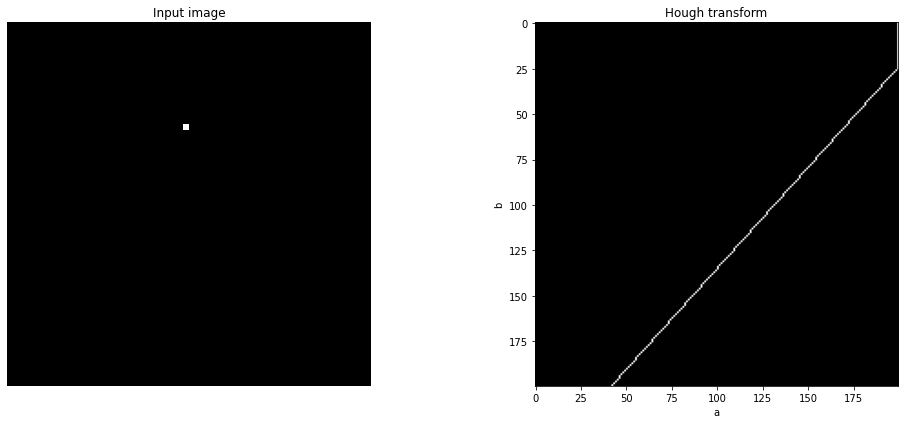

In [16]:
im = np.zeros((64,64), dtype=np.uint8)
im[18, 31] = 1

show_hough(ab_hough(im), im)

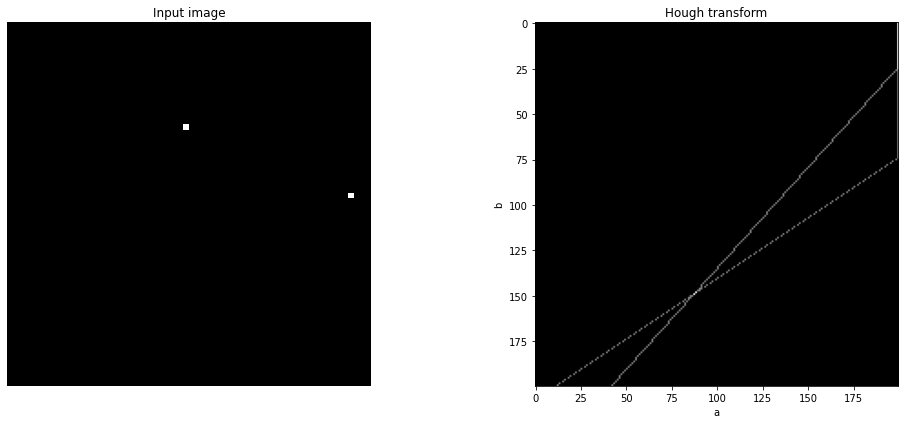

In [17]:
im2 = np.zeros((64,64), dtype=np.uint8)
im2[18, 31] = 1
im2[30, 60] = 1
show_hough(ab_hough(im2), im2)

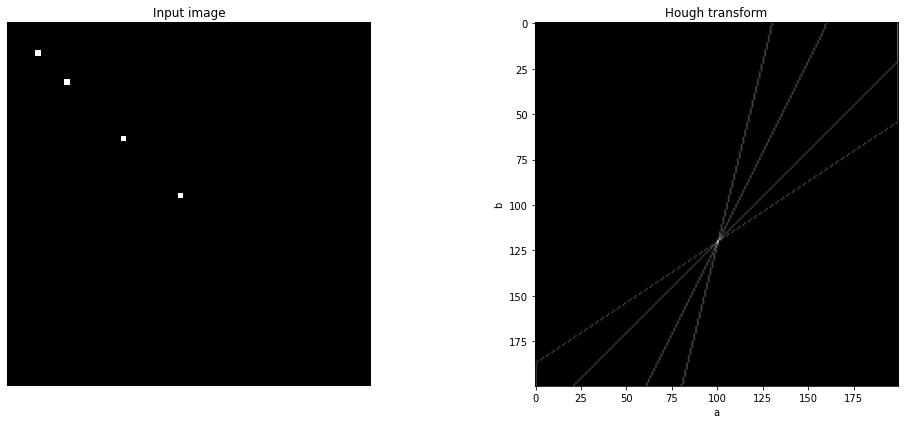

In [25]:
im4 = np.zeros((64,64), dtype=np.uint8)
im4[5, 5] = 1
im4[10, 10] = 1
im4[20, 20] = 1
im4[30, 30] = 1
show_hough(ab_hough(im4), im4)

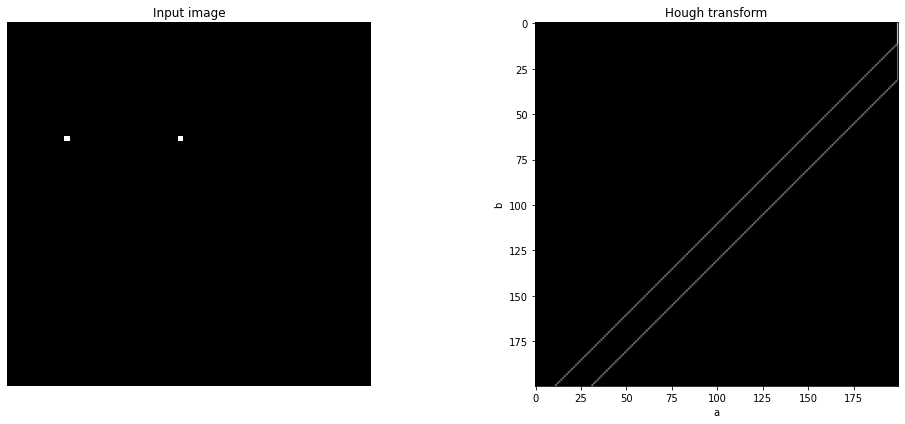

In [26]:
im_horizontal = np.zeros((64,64), dtype=np.uint8)
im_horizontal[20, 30] = 1
im_horizontal[20, 10] = 1
show_hough(ab_hough(im_horizontal), im_horizontal)